<a href="https://colab.research.google.com/github/Subhash23jan/ML-LAB/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the dataset from CSV file
data = pd.read_csv('/content/Iris.csv')
data.describe()



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [43]:
# Remove outliers using Z-score method
def remove_outliers_zscore(df, threshold=2):
    z_scores = (df - df.mean()) / df.std()
    return df[(z_scores < threshold).all(axis=1)]

# Select numerical columns for outlier removal
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = remove_outliers_zscore(data[numerical_cols])
data.dropna(inplace=True)
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,132.000000,132.000000,132.000000,132.000000,132.000000
mean,76.515152,5.768939,2.982576,3.762879,1.214394
std,42.465160,0.747324,0.361189,1.644255,0.741376
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,41.750000,5.100000,2.800000,1.600000,0.300000
50%,76.500000,5.800000,3.000000,4.400000,1.300000
75%,111.250000,6.400000,3.200000,5.100000,1.800000
max,150.000000,7.200000,3.700000,6.100000,2.500000


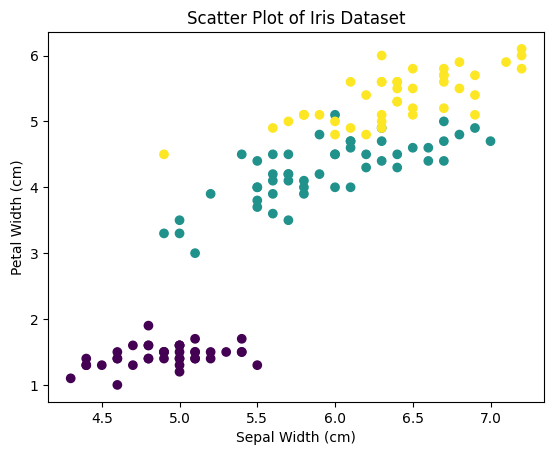

In [44]:

# Set the target variable and display the head
X = data.drop('Species', axis=1)  # Features
y = data['Species']  # Target variable

# Plot
plt.scatter(data['SepalLengthCm'], data['PetalLengthCm'], c=data['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}), cmap='viridis')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Scatter Plot of Iris Dataset')
plt.show()


In [52]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.45, random_state=50)

# Call the SVM classifier
svm_classifier = SVC(kernel='linear')  # You can change the kernel as needed

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# Predict accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0
